In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [51]:
df = pd.read_csv("/Users/karananand/ML_Project/notebook/data/stud.csv")

In [52]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [53]:
df.shape

(1000, 8)

#### Check Missing Value

In [54]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Check Duplicates

In [55]:
df.duplicated().sum()

0

#### Check Data Types

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [57]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [58]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [59]:
for c in df.columns[:-3]:
    print(f"Unique values in {c}: {df[c].unique()}")

Unique values in gender: ['female' 'male']
Unique values in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test_preparation_course: ['none' 'completed']


In [62]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df['average'] = df['total_score']/3

In [116]:
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
cat_features = [col for col in df.columns if df[col].dtype == 'O']

#### EDA Plots

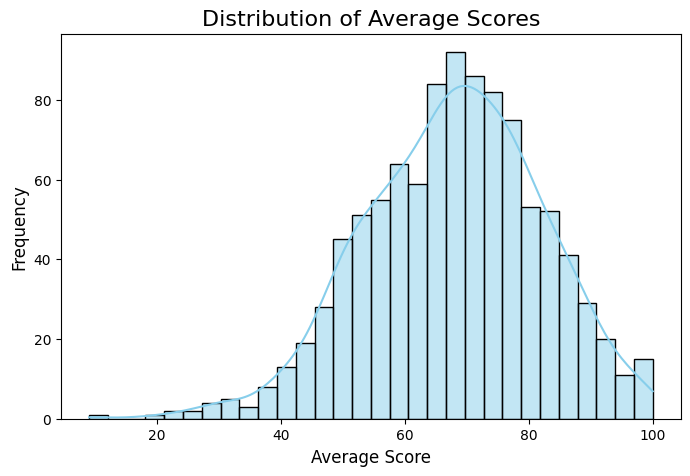

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average'], bins=30, kde=True,color='skyblue')
# sns.histplot(data=df, x='average', bins=30, kde=True, hue=col')
plt.title('Distribution of Average Scores', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


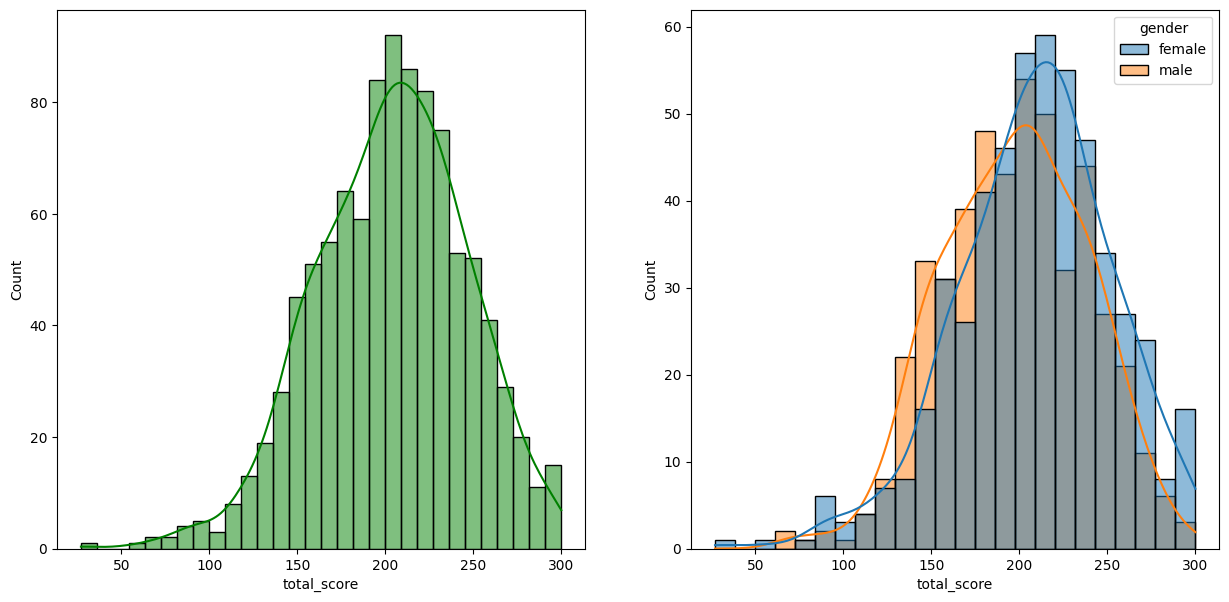

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

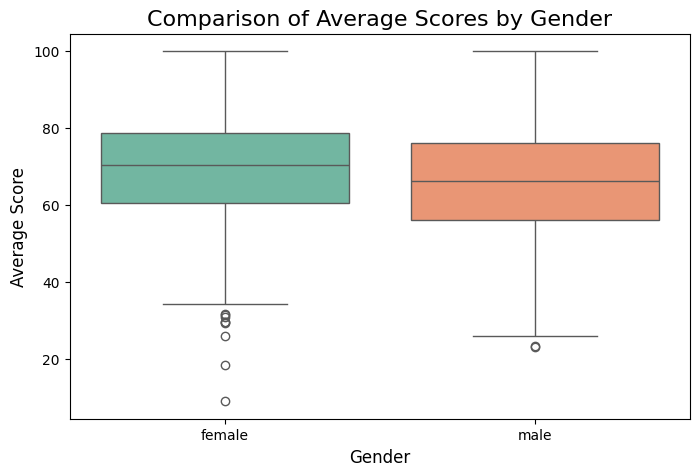

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='average', data=df, palette='Set2')
plt.title('Comparison of Average Scores by Gender', fontsize=16)
plt.xlabel('col', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

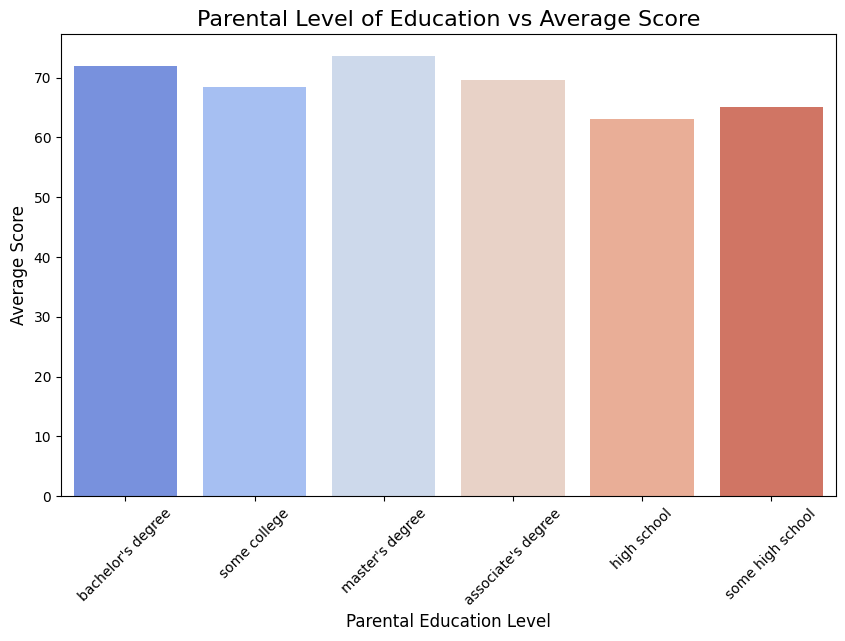

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='parental_level_of_education', y='average', data=df, palette='coolwarm', ci=None)
plt.xticks(rotation=45)
plt.title('Parental Level of Education vs Average Score', fontsize=16)
plt.xlabel('Parental Education Level', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

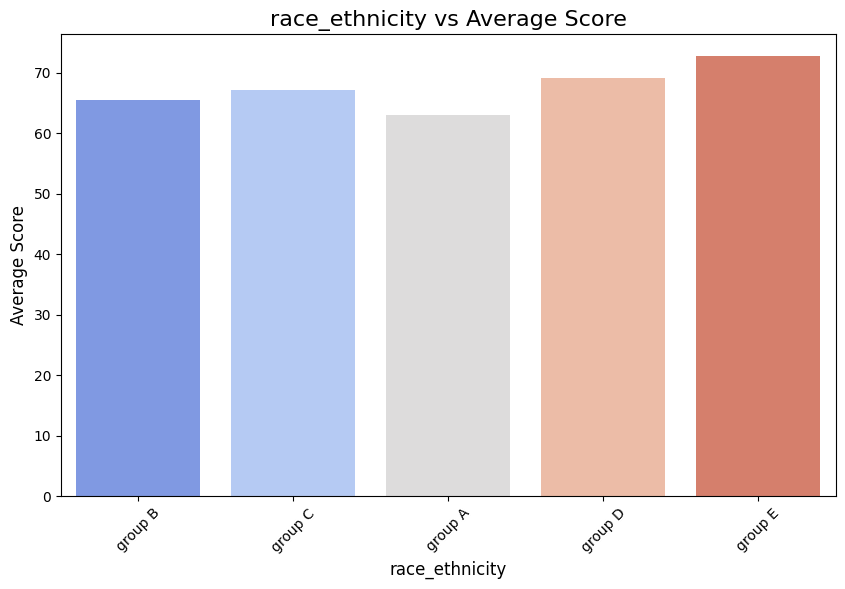

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='race_ethnicity', y='average', data=df, palette='coolwarm', ci=None)
plt.xticks(rotation=45)
plt.title('race_ethnicity vs Average Score', fontsize=16)
plt.xlabel('race_ethnicity', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

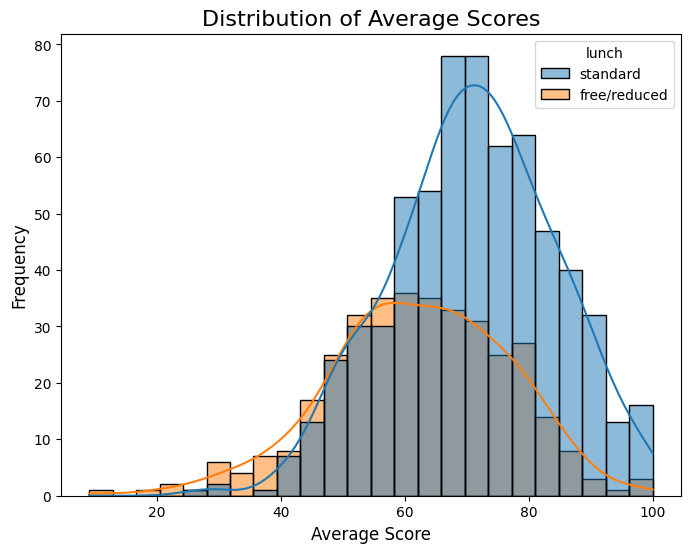

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Distribution of Average Scores', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

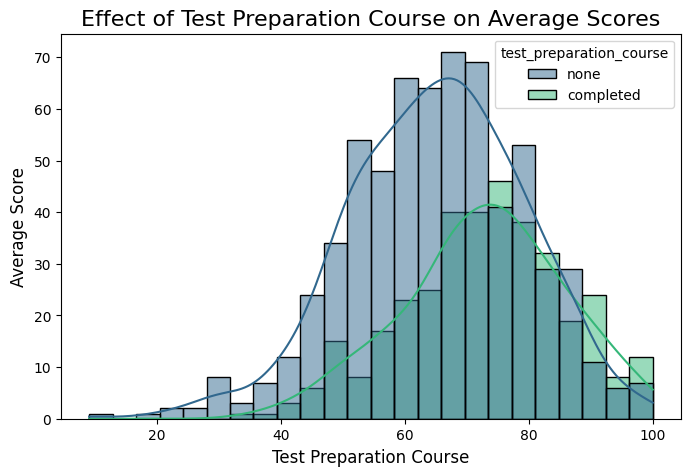

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(data = df, x='average', hue='test_preparation_course', palette='viridis', kde=True)
plt.title('Effect of Test Preparation Course on Average Scores', fontsize=16)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()

#### Other Stats

In [87]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


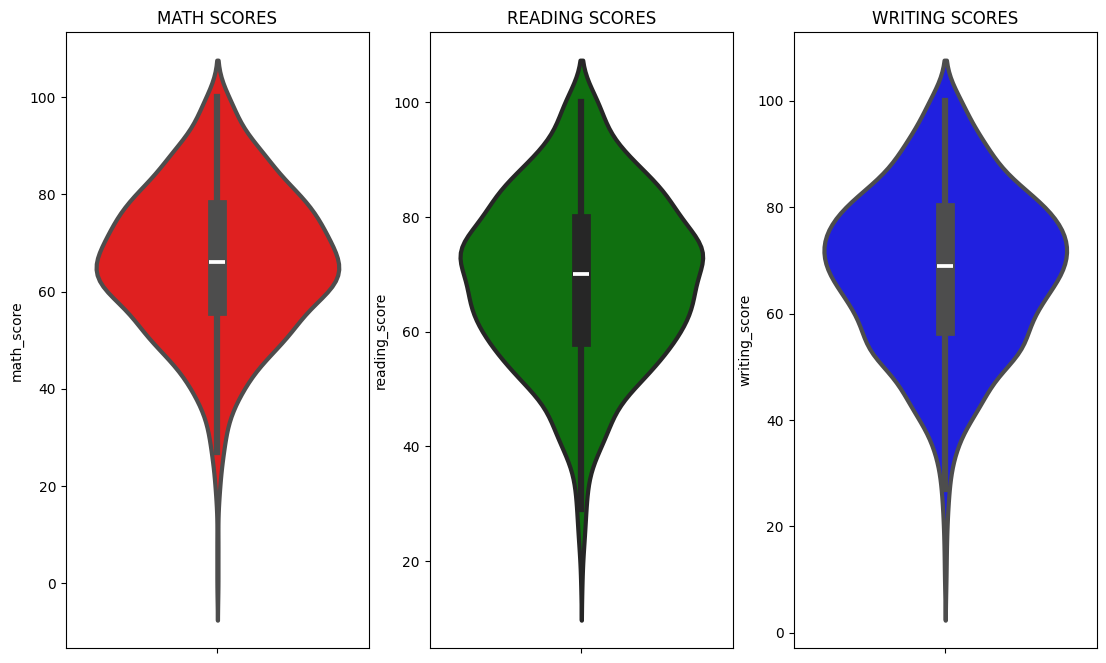

In [93]:
##Scores in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

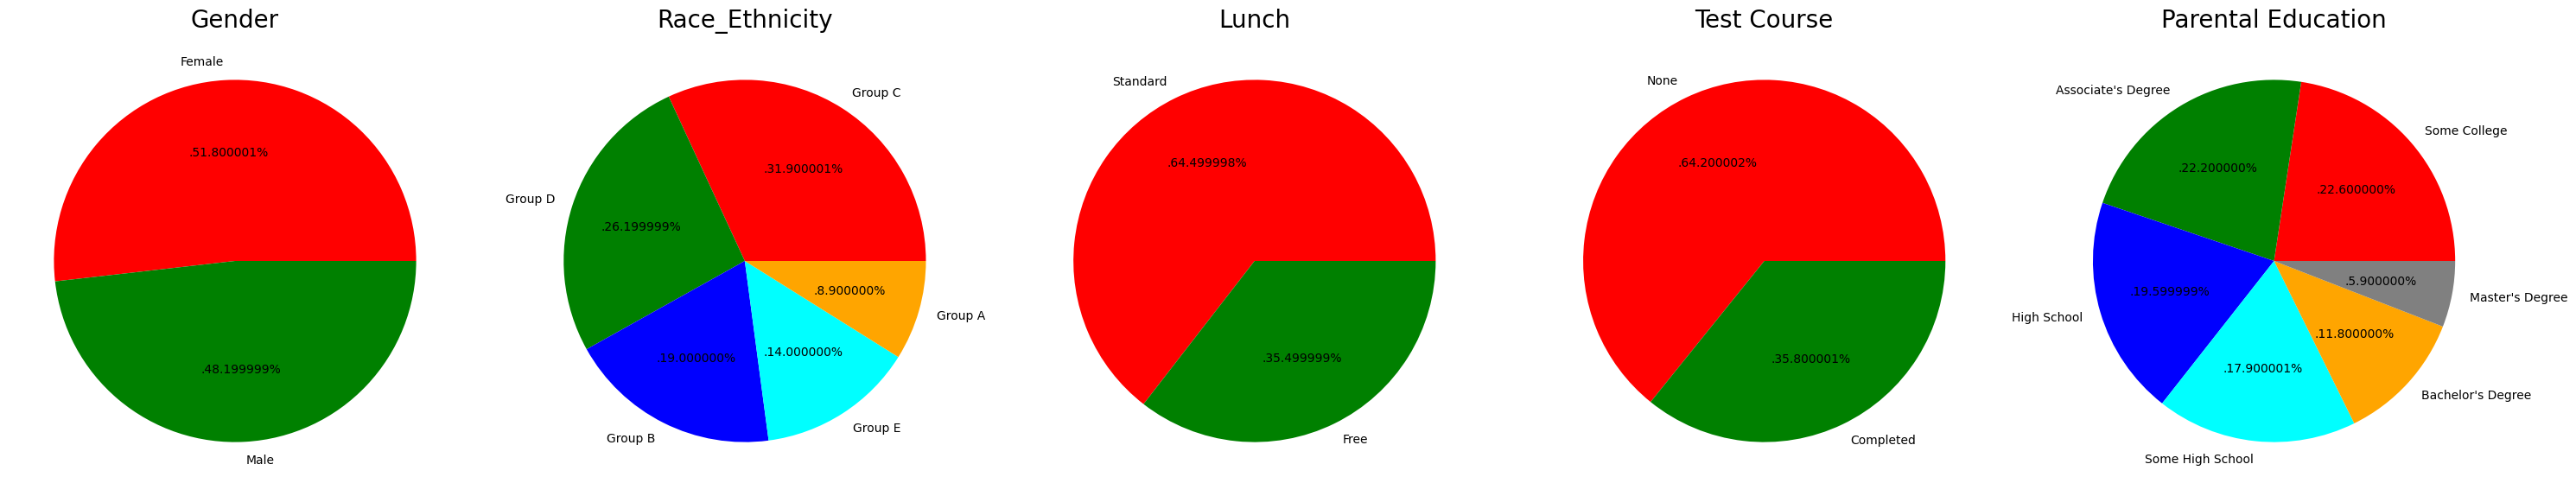

In [96]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df[col].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title(col, fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [112]:
col = 'gender'
print(df.groupby(col)['average'].mean())
print(df.groupby(col)['total_score'].mean())
print(df.groupby(col)['math_score'].mean())
print(df.groupby(col)['reading_score'].mean())
print(df.groupby(col)['writing_score'].mean())

gender
female    69.569498
male      65.837483
Name: average, dtype: float64
gender
female    208.708494
male      197.512448
Name: total_score, dtype: float64
gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64
gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64
gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64


In [113]:
col = 'race_ethnicity'
print(df.groupby(col)['average'].mean())
print(df.groupby(col)['total_score'].mean())
print(df.groupby(col)['math_score'].mean())
print(df.groupby(col)['reading_score'].mean())
print(df.groupby(col)['writing_score'].mean())

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average, dtype: float64
race_ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: total_score, dtype: float64
race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64
race_ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading_score, dtype: float64
race_ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing_score, dtype: float64


In [114]:
col = 'parental_level_of_education'
print(df.groupby(col)['average'].mean())
print(df.groupby(col)['total_score'].mean())
print(df.groupby(col)['math_score'].mean())
print(df.groupby(col)['reading_score'].mean())
print(df.groupby(col)['writing_score'].mean())

parental_level_of_education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average, dtype: float64
parental_level_of_education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total_score, dtype: float64
parental_level_of_education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math_score, dtype: float64
parental_level_of_education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading_sco

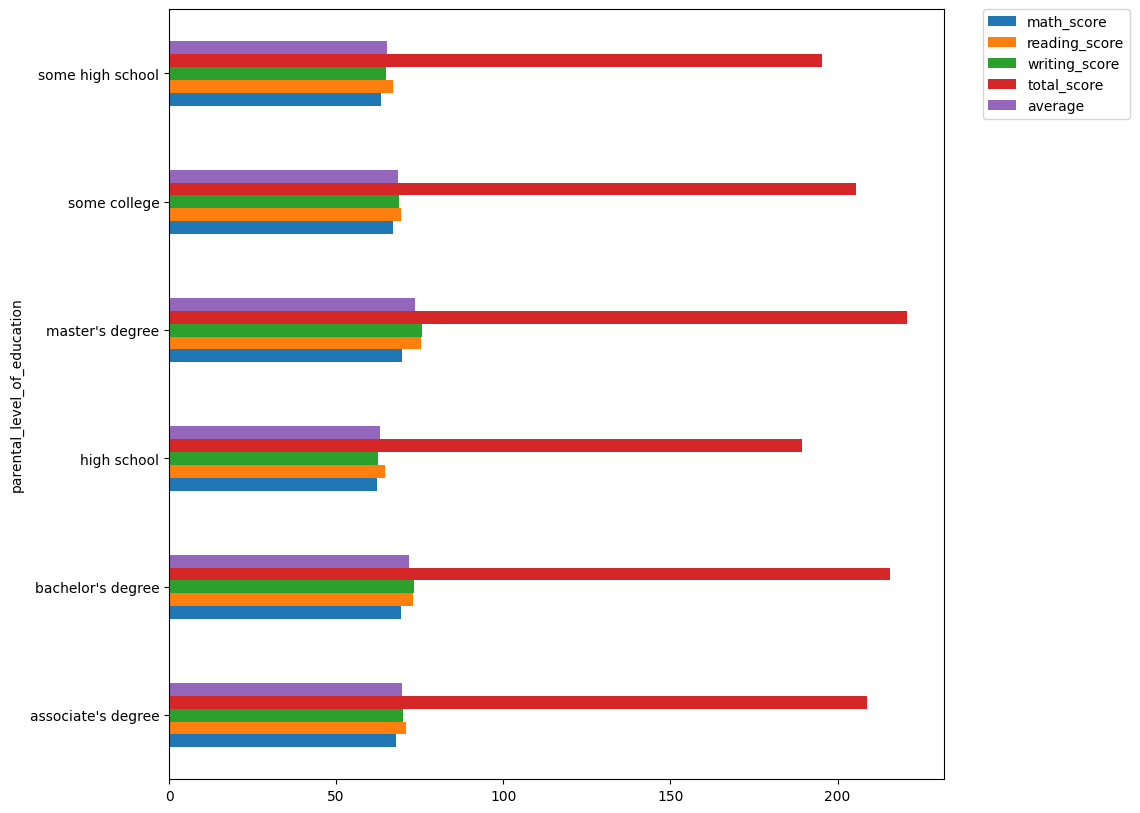

In [121]:
df.groupby('parental_level_of_education')[numeric_features].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

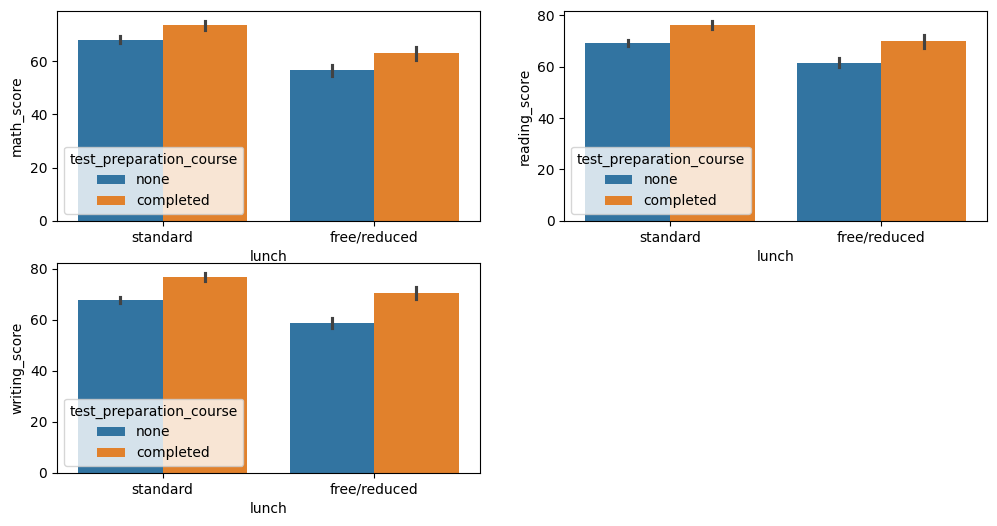

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

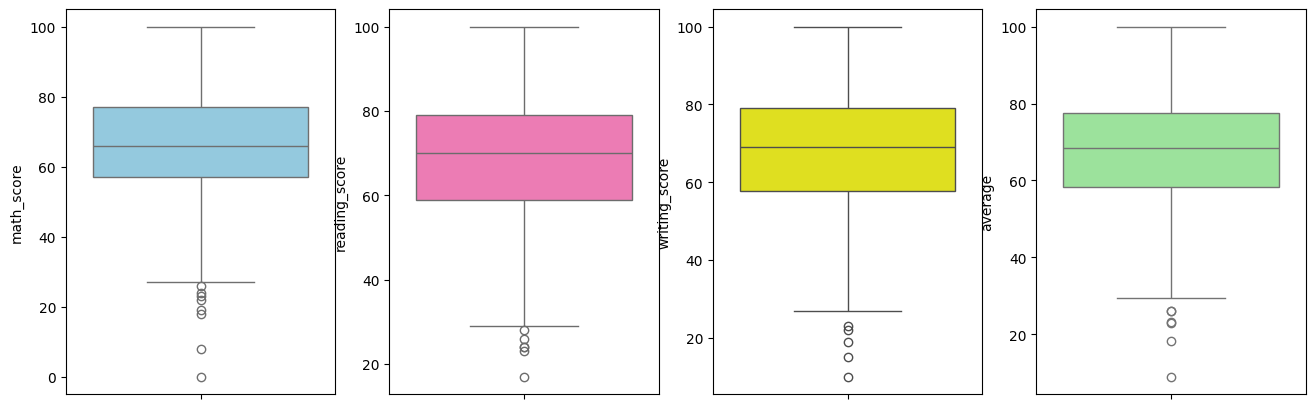

In [123]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

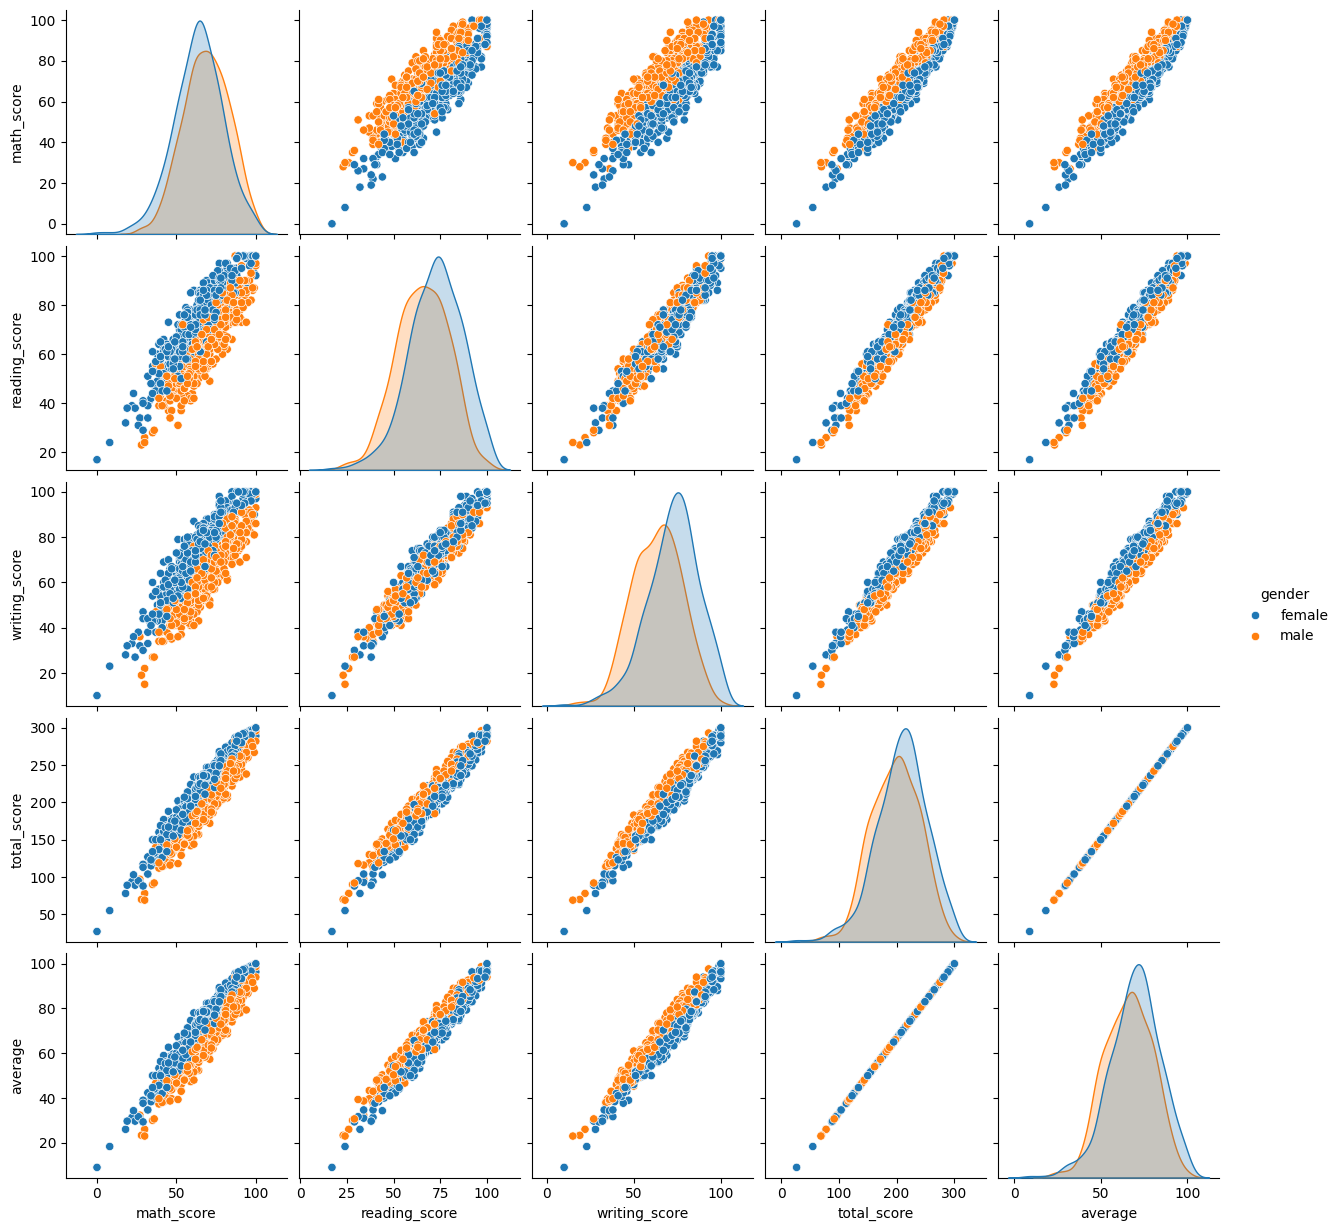

In [124]:
sns.pairplot(df,hue = 'gender')
plt.show()